In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
from pydub.playback import play
import spleeter
import wave
from pathlib import Path

In [14]:
def visualize_audio(wav):
    wav_obj = wave.open(wav, 'rb')
    sample_freq = wav_obj.getframerate()
    n_samples = wav_obj.getnframes()
    t_audio = n_samples/sample_freq
    n_channels = wav_obj.getnchannels
    signal_wave = wav_obj.readframes(n_samples)
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    l_channel = signal_array[0::2]
    r_channel = signal_array[1::2]
    times = np.linspace(0, n_samples/sample_freq, num=n_samples)
    plt.figure(figsize=(15,5))
    plt.plot(times, l_channel)
    plt.title('Left Channel')
    plt.ylabel("Signal Value")
    plt.xlabel('Time (s)')
    plt.xlim(0, t_audio)
    plt.show()
    plt.figure(figsize=(15,5))
    plt.specgram(l_channel, Fs=sample_freq, vmin=-20, vmax=50)
    plt.title('Left Channel')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.xlim(0, t_audio)
    plt.colorbar()
    plt.show()

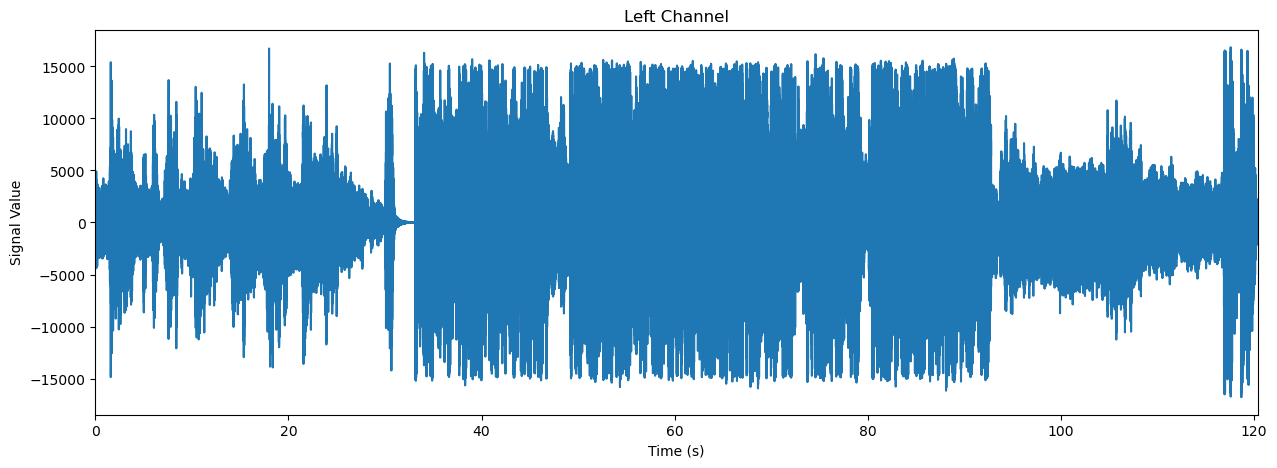

C:\Users\Neesarg\anaconda3\envs\music\lib\site-packages\matplotlib\axes\_axes.py:7628: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


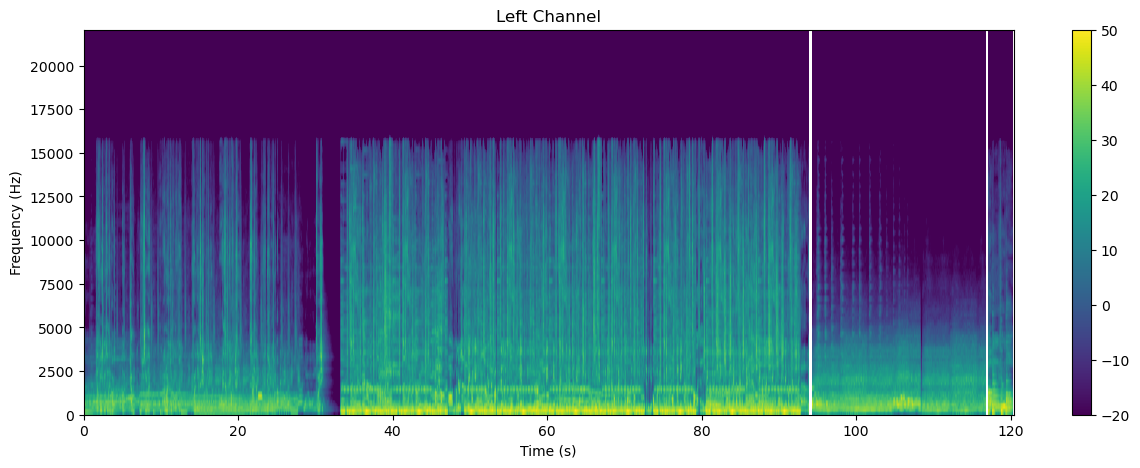

In [15]:
visualize_audio(full_sample)

In [18]:
!spleeter separate -p spleeter:5stems -o spleeter_output sample_song.wav

INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/5stems.tar.gz
INFO:spleeter:Validating archive checksum
INFO:spleeter:Extracting downloaded 5stems archive
INFO:spleeter:5stems model file(s) extracted
INFO:spleeter:File spleeter_output\sample_song/piano.wav written succesfully
INFO:spleeter:File spleeter_output\sample_song/vocals.wav written succesfully
INFO:spleeter:File spleeter_output\sample_song/bass.wav written succesfully
INFO:spleeter:File spleeter_output\sample_song/drums.wav written succesfully
INFO:spleeter:File spleeter_output\sample_song/other.wav written succesfully


In [19]:
bass_stem = "spleeter_output/sample_song/bass.wav"
drums_stem = "spleeter_output/sample_song/drums.wav"
other_stem = "spleeter_output/sample_song/other.wav"
piano_stem = "spleeter_output/sample_song/piano.wav"
vocals_stem = "spleeter_output/sample_song/vocals.wav"

bass


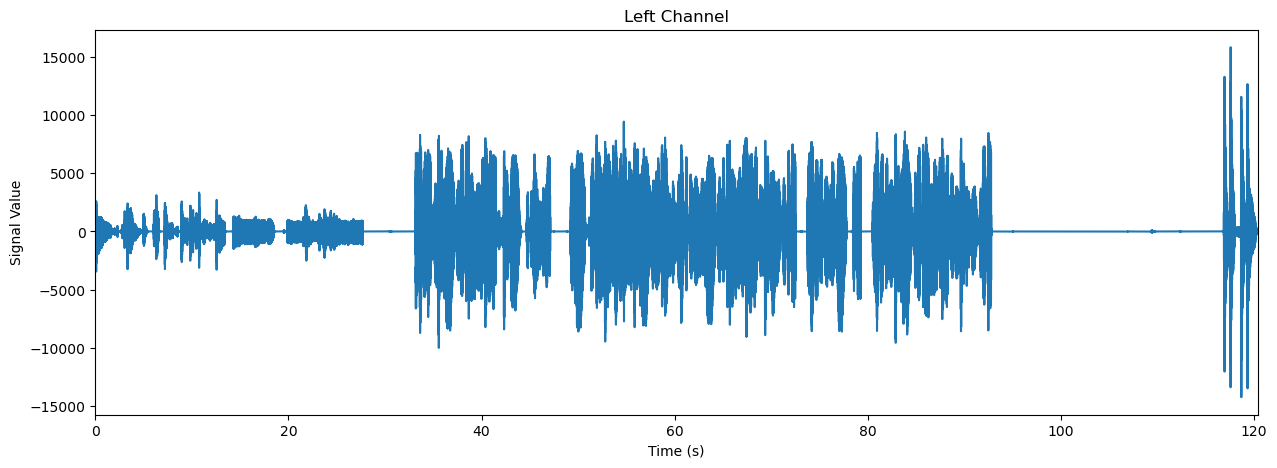

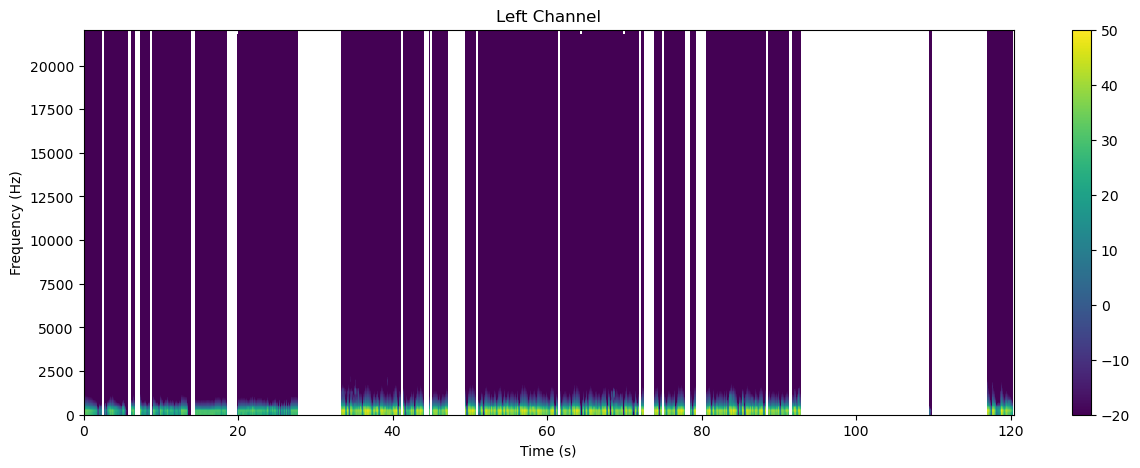

drums


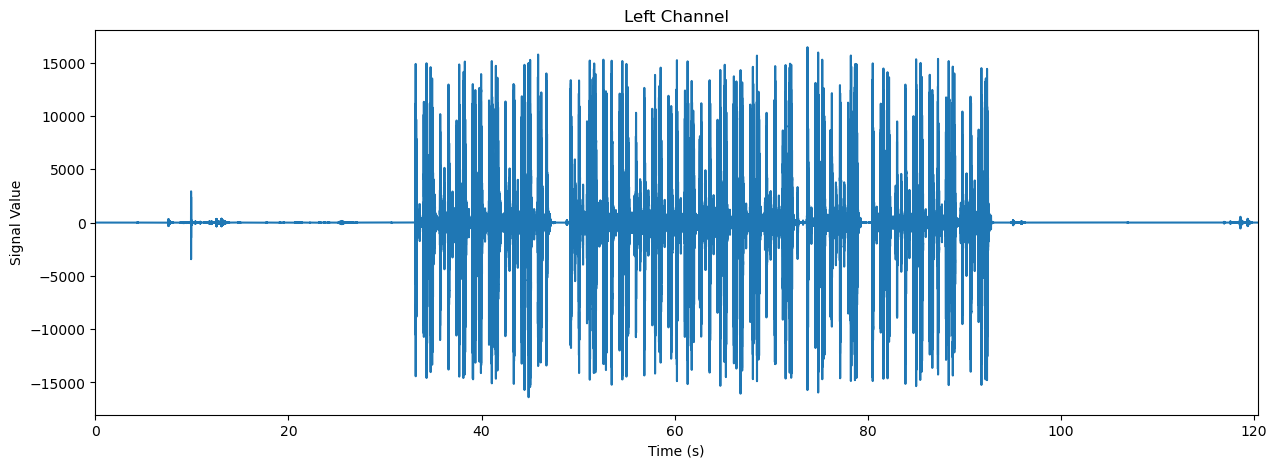

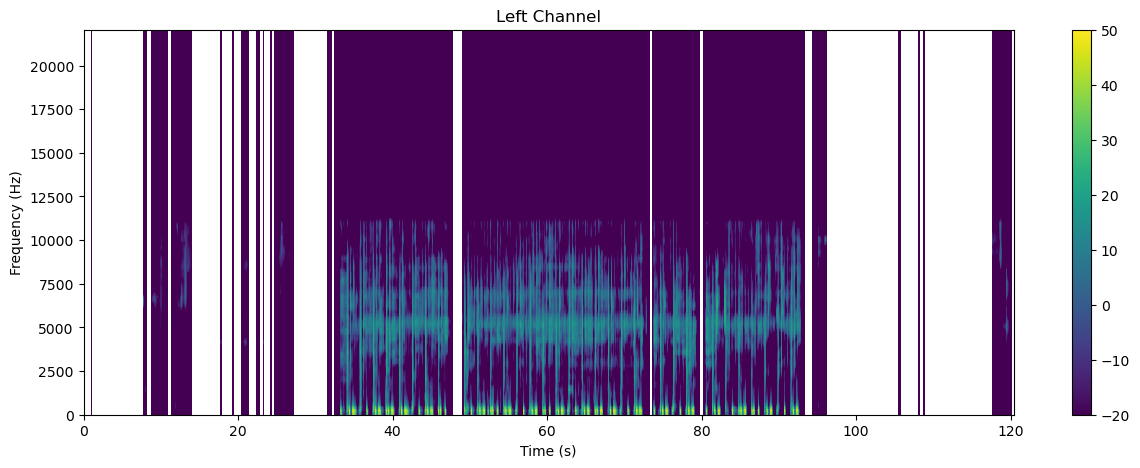

other


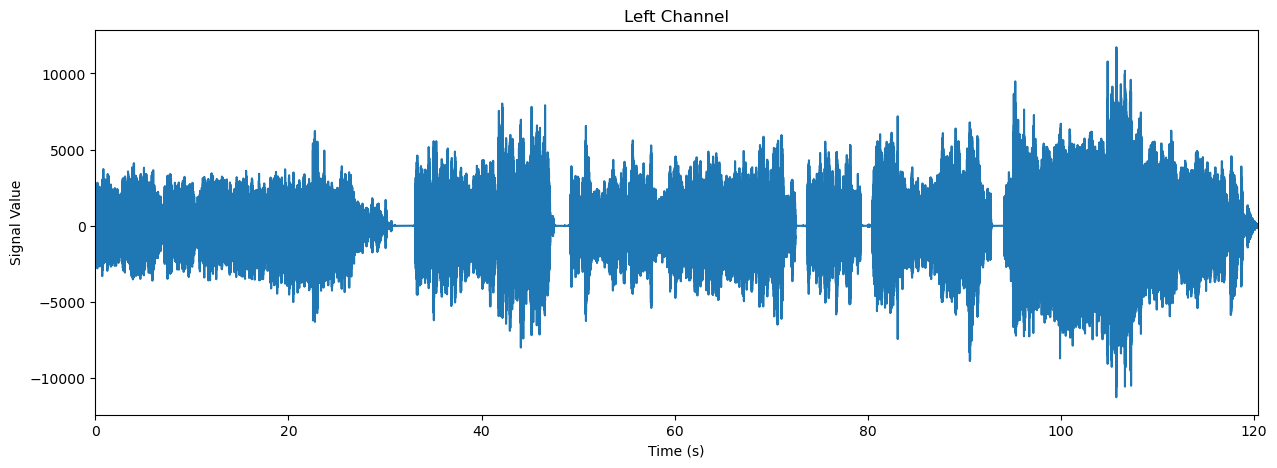

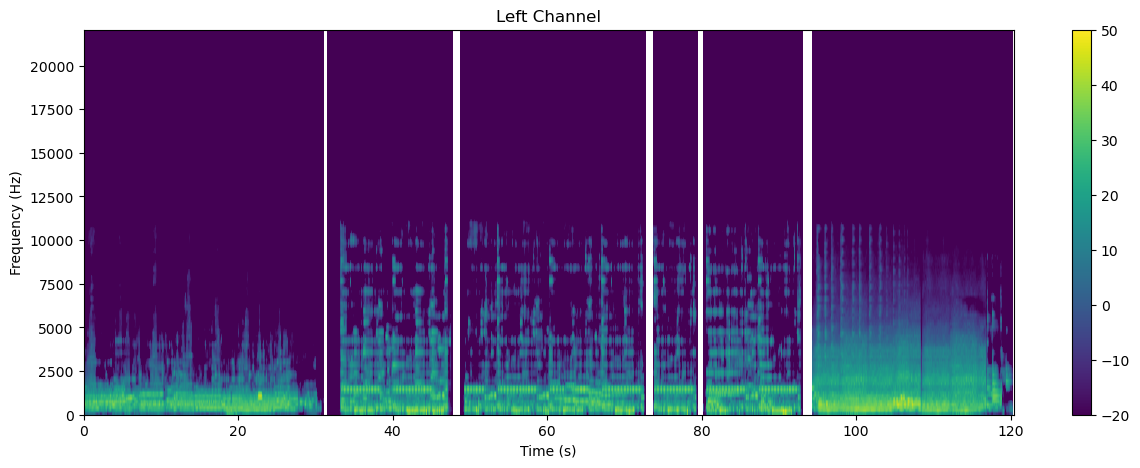

piano


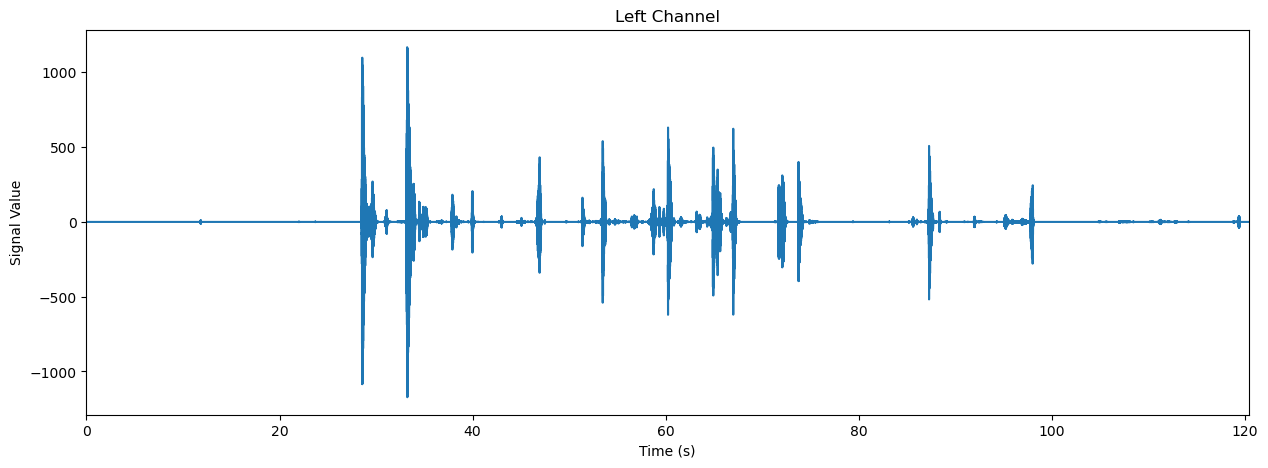

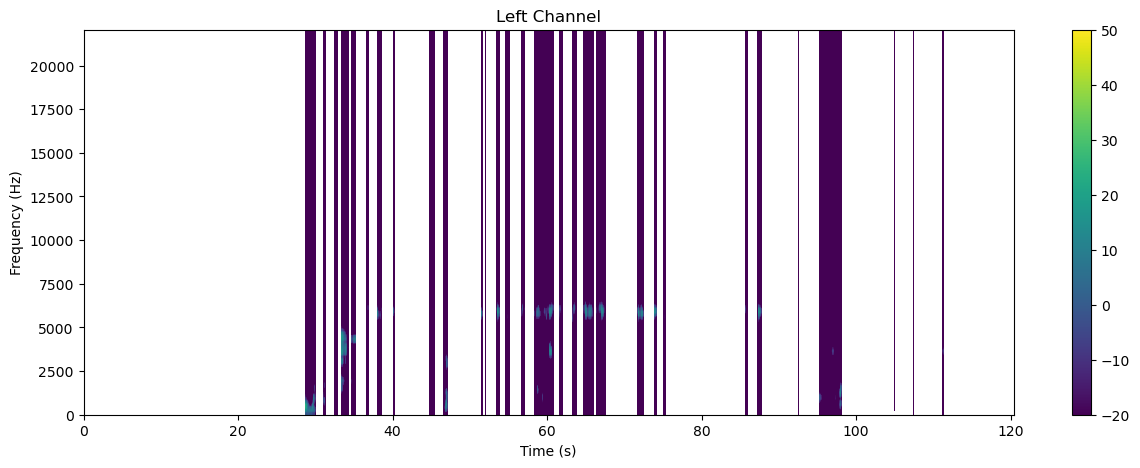

vocals


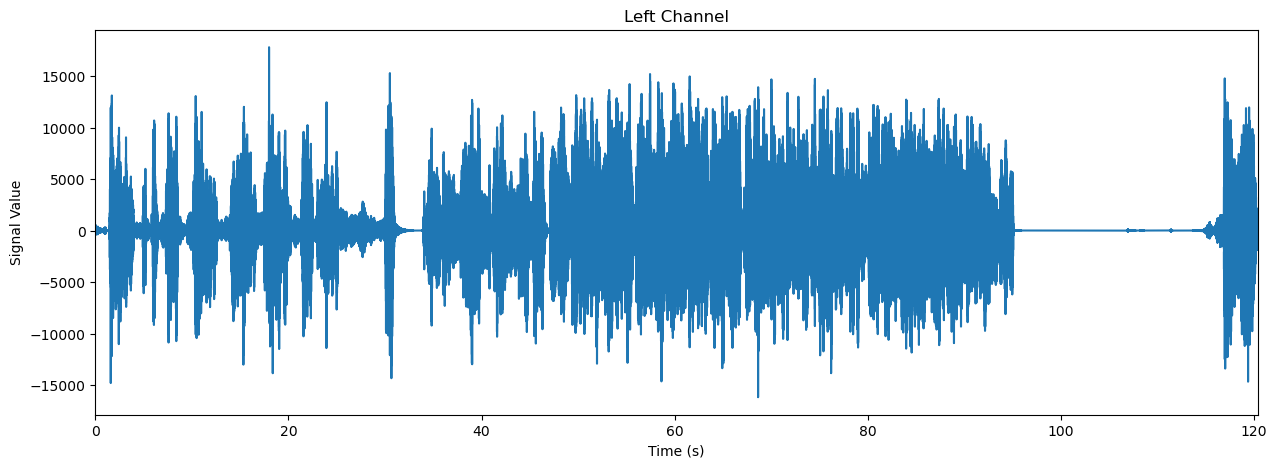

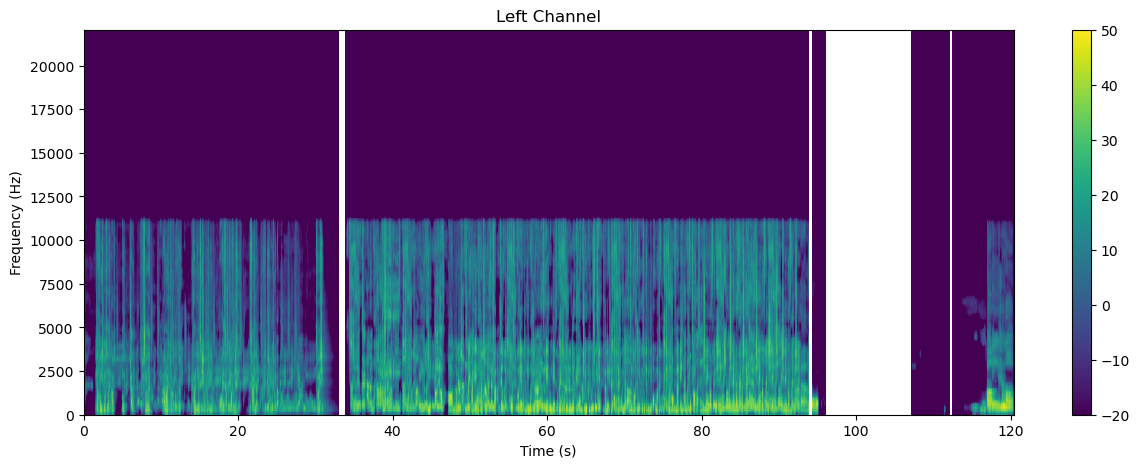

In [20]:
stems = (bass_stem, drums_stem, other_stem, piano_stem, vocals_stem)
for stem in stems:
    print(Path(stem).stem)
    visualize_audio(stem)